In [43]:
import pyaerocom as pya
import matplotlib.pyplot as plt
import pyaerocom as pya
from pyaerocom.io.readungridded import ReadUngridded
from pyaerocom.io.readgridded import ReadGridded
from pyaerocom.io.helpers_units import (unitconv_sfc_conc_bck, 
                                        unitconv_sfc_conc, 
                                        unitconv_wet_depo_bck,
                                        unitconv_wet_depo, unitconv_wet_depo_from_emep)
import pandas as pd
import numpy as np
from pyaerocom.plot import df_to_heatmap

Check version of pyaerocom:

In [2]:
pya.__version__ #0.8.1.dev1

'0.8.0.dev30'

Viewing the supported variables. 

In [235]:
pya.browse_database('*GFDL-AM4-met2010_AP3-CTRL*')

Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_sftlf_Surface_2010_fixed.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_areacella_Surface_2010_fixed.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_rsds_Surace_2010_monthly.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: FileConventionError("Failed to extract variable name from file aerocom3_GFDL-AM4-met2010_AP3-CTRL_rsds_Surace_2010_monthly.nc using file convention aerocom3.\nError: FileConventionError('Invalid file name (Aerocom 3 naming convention).\\n/lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/GFDL-AM4-met2010_AP3-CTRL/renamed/aerocom3_GFDL-AM4-met2010_AP3-CTRL_rsds_Surace_2010_monthly.nc\\nInvalid string identifier for vertical coordinate: Surace')")
Failed to import file aerocom3_GFDL-AM4-met


Pyaerocom ReadGridded
---------------------
Data ID: GFDL-AM4-met2010_AP3-CTRL
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/GFDL-AM4-met2010_AP3-CTRL/renamed
Available experiments: ['AP3-CTRL']
Available years: [2008, 2009, 2010]
Available frequencies ['monthly' 'daily']
Available variables: ['abs550aer', 'ac550aer', 'airmass', 'areacella', 'cdnc', 'chepsoa', 'clt', 'concdms', 'concso2', 'dh', 'drybc', 'drydust', 'drypoa', 'dryso4', 'drysoa', 'dryss', 'ec550aer', 'emibc', 'emidust', 'emipoa', 'emiso2', 'emiss', 'loadbc', 'loaddu', 'loadlgdst', 'loadoa', 'loadsmdst', 'loadso4', 'loadss', 'mmrbc', 'mmrdust', 'mmroa', 'mmrpm1', 'mmrpm10', 'mmrpm2p5', 'mmrso4', 'mmrss', 'od550aer', 'od550bc', 'od550dust', 'od550lt1aer', 'od550oa', 'od550so4', 'od550ss', 'od870aer', 'orog', 'pfull', 'pr', 'ps', 'rho', 'rlds', 'rldscs', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rsus', 'rsuscs', 'rsut', 'rsutcs', 'sftlf', 'tas', 'tntrl', 'tntrs', 'we

# Problems  with collocating 'GFDL-AM4-met2010_AP3-CTRL' and aas et al 
## look more into this later

In [3]:
DATA_ID_models = ['OsloCTM3v1.01-met2010_AP3-CTRL',  'CAM5-ATRAS_AP3-CTRL']

In [4]:
vars_to_retrieve = 'wetso4' # they all have the same unit

In [5]:
DATA_ID = 'GAWTADsubsetAasEtAl'
VAR_TO_READ = 'wetso4'
aas_reader = ReadUngridded(DATA_ID)
ungridded_data = aas_reader.read(datasets_to_read = 'GAWTADsubsetAasEtAl', vars_to_retrieve = 'wetso4')

In [18]:
# ungridded_data.to_station_data('Algoma')

In [7]:
reader_model = pya.io.ReadGridded(DATA_ID_models[0])
gridded_data = reader_model.read(vars_to_retrieve = [vars_to_retrieve], start = 2010)

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes


In [214]:
gridded_data = [pya.io.ReadGridded(ID).read(vars_to_retrieve = [vars_to_retrieve], start = 2010)[0] 
                for ID in DATA_ID_models ]

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes
Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_sftlf_Surface_2010_fixed.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_areacella_Surface_2010_fixed.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_rsds_Surace_2010_monthly.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: FileConventionError("Failed to extract variable name from file aerocom3_GFDL-AM4-met2010_AP3-CTRL_rsds_Surace_2010_monthly.nc using file convention aerocom3.\nError: FileConvention

In [227]:
gridded_data

[pyaerocom.GriddedData
 Grid data: <iris 'Cube' of wetso4 / (kg m-2 s-1) (time: 12; latitude: 80; longitude: 160)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of tendency_of_atmosphere_mass_content_of_sulfate_dry_aerosol_particles_due_to_wet_deposition / (kg m-2 s-1) (time: 12; latitude: 180; longitude: 288)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of wet deposition rate of so4 / (kg m-2 s-1) (time: 12; latitude: 96; longitude: 144)>]

In [231]:
gridded_data[0:2]

[pyaerocom.GriddedData
 Grid data: <iris 'Cube' of wetso4 / (kg m-2 s-1) (time: 12; latitude: 80; longitude: 160)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of tendency_of_atmosphere_mass_content_of_sulfate_dry_aerosol_particles_due_to_wet_deposition / (kg m-2 s-1) (time: 12; latitude: 180; longitude: 288)>]

In [232]:
ONE = pya.colocation.colocate_gridded_ungridded(gridded_data[0], 
                            ungridded_data, ts_type='monthly')


Setting wetso4 outlier lower lim: 0.00
Setting wetso4 outlier upper lim: 10000.00
Interpolating data of shape (12, 80, 160). This may take a while.
/home/hannas/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/hannas/anaconda3/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]
Successfully interpolated cube
/home/hannas/Desktop/pyaerocom/pyaerocom/colocation.py:4

In [236]:
#two = pya.colocation.colocate_gridded_ungridded(gridded_data[1], 
#                            ungridded_data, ts_type='monthly')

# ColocationError: No observations could be found that match the colocation constraints
 

In [248]:
THREE = pya.colocation.colocate_gridded_ungridded(gridded_data[2], 
                            ungridded_data, ts_type='monthly')

Setting wetso4 outlier lower lim: 0.00
Setting wetso4 outlier upper lim: 10000.00
Interpolating data of shape (12, 96, 144). This may take a while.
/home/hannas/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/hannas/anaconda3/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]
Successfully interpolated cube
/home/hannas/Desktop/pyaerocom/pyaerocom/colocation.py:4

# Colocate 

In [319]:
table = ONE.data.sel(station_name = 'Abington (CT15)').to_dataframe()
table2 = THREE.data.sel(station_name = 'Abington (CT15)').to_dataframe()
table = table.drop(columns=['var_name', 'var_units', 'ts_type_src', 'station_name', 
                              'altitude', 'latitude', 'longitude' ])
table2 = table2.drop(columns=['var_name', 'var_units', 'ts_type_src', 'station_name', 
                              'altitude', 'latitude', 'longitude' ])
table2 = table2.unstack(0)
table = table.unstack(0)

In [329]:
table.rename(columns={'GAWTADsubsetAasEtAl': 'obs', 'OsloCTM3v1.01-met2010_AP3-CTRL': 
                     'OsloCTM', 'wetso4':'raw', 'data_source': None}, inplace = True)

In [337]:
#table = table['raw']
table.columns = ['obs', 'Oslo']

In [347]:
table

,obs,Oslo
time,,
2010-01-15,NaN,1.101474e-11
2010-02-15,0.001201,1.617417e-11
2010-03-15,0.002394,3.028526e-11
2010-04-15,0.001815,2.441301e-11
2010-05-15,0.002136,1.239039e-11
2010-06-15,0.004404,3.170837e-11
2010-07-15,0.002919,1.745229e-11
2010-08-15,0.004150,2.264605e-11
2010-09-15,NaN,1.474363e-11


In [321]:
table.columns

MultiIndex(levels=[['wetso4'], ['GAWTADsubsetAasEtAl', 'OsloCTM3v1.01-met2010_AP3-CTRL']],
           codes=[[0, 0], [0, 1]],
           names=[None, 'data_source'])

In [322]:
table

wetso4                               
data_source GAWTADsubsetAasEtAl OsloCTM3v1.01-met2010_AP3-CTRL
time                                                          
2010-01-15                  NaN                   1.101474e-11
2010-02-15             0.001201                   1.617417e-11
2010-03-15             0.002394                   3.028526e-11
2010-04-15             0.001815                   2.441301e-11
2010-05-15             0.002136                   1.239039e-11
2010-06-15             0.004404                   3.170837e-11
2010-07-15             0.002919                   1.745229e-11
2010-08-15             0.004150                   2.264605e-11
2010-09-15                  NaN                   1.474363e-11
2010-10-15                  NaN                   2.707664e-11
2010-11-15             0.001329                   1.241212e-11
2010-12-15             0.001029                   1.188433e-11

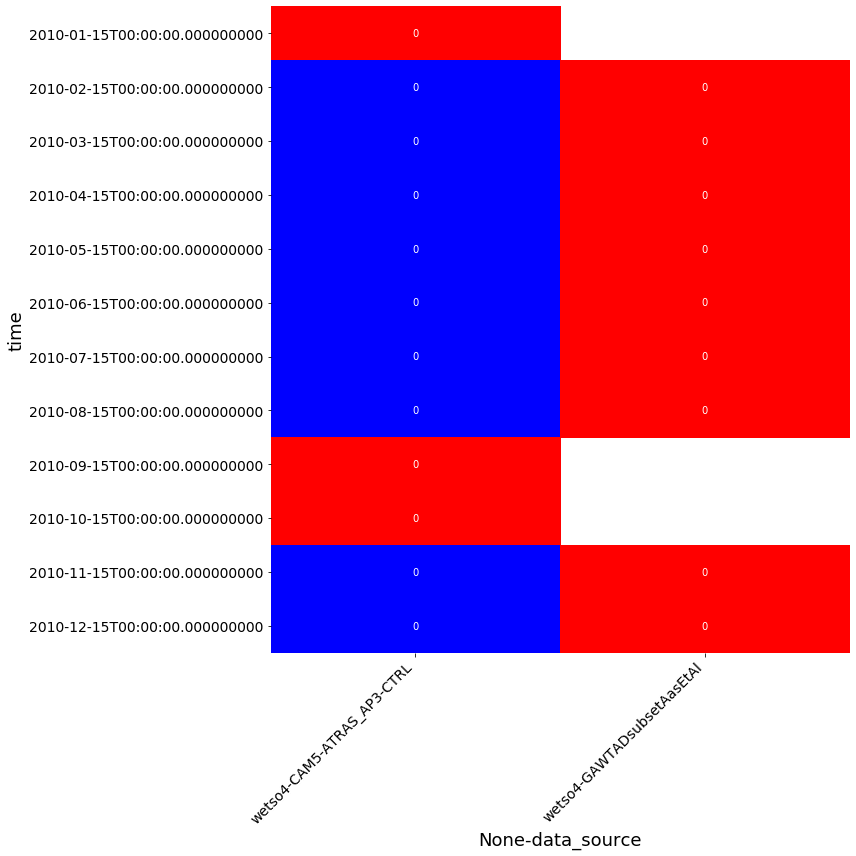

In [323]:
df_to_heatmap(table2)

In [327]:
table

wetso4                               
data_source GAWTADsubsetAasEtAl OsloCTM3v1.01-met2010_AP3-CTRL
time                                                          
2010-01-15                  NaN                   1.101474e-11
2010-02-15             0.001201                   1.617417e-11
2010-03-15             0.002394                   3.028526e-11
2010-04-15             0.001815                   2.441301e-11
2010-05-15             0.002136                   1.239039e-11
2010-06-15             0.004404                   3.170837e-11
2010-07-15             0.002919                   1.745229e-11
2010-08-15             0.004150                   2.264605e-11
2010-09-15                  NaN                   1.474363e-11
2010-10-15                  NaN                   2.707664e-11
2010-11-15             0.001329                   1.241212e-11
2010-12-15             0.001029                   1.188433e-11

In [325]:
table = pd.merge(table, table2, right_on='wetso4', left_index=True)

ValueError: The column label 'wetso4' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

In [328]:
table 

wetso4                               
data_source GAWTADsubsetAasEtAl OsloCTM3v1.01-met2010_AP3-CTRL
time                                                          
2010-01-15                  NaN                   1.101474e-11
2010-02-15             0.001201                   1.617417e-11
2010-03-15             0.002394                   3.028526e-11
2010-04-15             0.001815                   2.441301e-11
2010-05-15             0.002136                   1.239039e-11
2010-06-15             0.004404                   3.170837e-11
2010-07-15             0.002919                   1.745229e-11
2010-08-15             0.004150                   2.264605e-11
2010-09-15                  NaN                   1.474363e-11
2010-10-15                  NaN                   2.707664e-11
2010-11-15             0.001329                   1.241212e-11
2010-12-15             0.001029                   1.188433e-11

In [326]:
table['wetso4']['OsloCTM'] = table['raw']['OsloCTM']

KeyError: 'raw'

In [318]:
table

wetso4_x                                 \
data_source GAWTADsubsetAasEtAl OsloCTM3v1.01-met2010_AP3-CTRL   
time                                                             
2010-01-15                  NaN                   1.101474e-11   
2010-02-15             0.001201                   1.617417e-11   
2010-03-15             0.002394                   3.028526e-11   
2010-04-15             0.001815                   2.441301e-11   
2010-05-15             0.002136                   1.239039e-11   
2010-06-15             0.004404                   3.170837e-11   
2010-07-15             0.002919                   1.745229e-11   
2010-08-15             0.004150                   2.264605e-11   
2010-09-15                  NaN                   1.474363e-11   
2010-10-15                  NaN                   2.707664e-11   
2010-11-15             0.001329                   1.241212e-11   
2010-12-15             0.001029                   1.188433e-11   

                       wetso4_y                      
data_source CAM5-ATRAS_AP3-CTRL GAWTADsubsetAasEtAl  
time                                                 
2010-01-15         7.619458e-12                 NaN  
2010-02-15         8.648099e-12            0.001201  
2010-03-15         3.736910e-11            0.002394  
2010-04-15         4.198654e-11            0.001815  
2010-05-15         2.833630e-11            0.002136  
2010-06-15         7.977421e-11            0.004404  
2010-07-15         4.711749e-11            0.002919  
2010-08-15         4.453999e-11            0.004150  
2010-09-15         4.918928e-11                 NaN  
2010-10-15         2.946043e-11                 NaN  
2010-11-15         1.964703e-11            0.001329  
2010-12-15         5.828273e-12            0.001029

In [269]:
table.columns.names[1] = None

TypeError: 'FrozenList' does not support mutable operations.

In [195]:
df = cropped

In [197]:
idx = df.unstack(0)

In [308]:
table['raw'].columns.name = None

In [309]:
table

raw                            wetso4                    
data_source       obs       OsloCTM CAM5-ATRAS_AP3-CTRL GAWTADsubsetAasEtAl
time                                                                       
2010-01-15        NaN  1.101474e-11        7.619458e-12                 NaN
2010-02-15   0.001201  1.617417e-11        8.648099e-12            0.001201
2010-03-15   0.002394  3.028526e-11        3.736910e-11            0.002394
2010-04-15   0.001815  2.441301e-11        4.198654e-11            0.001815
2010-05-15   0.002136  1.239039e-11        2.833630e-11            0.002136
2010-06-15   0.004404  3.170837e-11        7.977421e-11            0.004404
2010-07-15   0.002919  1.745229e-11        4.711749e-11            0.002919
2010-08-15   0.004150  2.264605e-11        4.453999e-11            0.004150
2010-09-15        NaN  1.474363e-11        4.918928e-11                 NaN
2010-10-15        NaN  2.707664e-11        2.946043e-11                 NaN
2010-11-15   0.001329  1.241212e-11        1.964703e-11            0.001329
2010-12-15   0.001029  1.188433e-11        5.828273e-12            0.001029

In [305]:
df_to_heatmap(table['raw'])

AttributeError: So far, heatmaps can only be created for single column tabular data (e.g. Bias or RMSE) with a partly unstacked MultiIndex

In [190]:
data = df.join(df['wetso4']['OsloCTM3v1.01-met2010_AP3-CTRL'].subtract(df['wetso4']['GAWTADsubsetAasEtAl']).rename(
        columns={'OsloCTM3v1.01-met2010_AP3-CTRL':'bias'}))

ValueError: Other Series must have a name

In [185]:
cropped['wetso4']['hh'] = np.arange(12)

/home/hannas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
cropped

wetso4                               
data_source GAWTADsubsetAasEtAl OsloCTM3v1.01-met2010_AP3-CTRL
time                                                          
2010-01-15                  NaN                   1.101474e-11
2010-02-15             0.001201                   1.617417e-11
2010-03-15             0.002394                   3.028526e-11
2010-04-15             0.001815                   2.441301e-11
2010-05-15             0.002136                   1.239039e-11
2010-06-15             0.004404                   3.170837e-11
2010-07-15             0.002919                   1.745229e-11
2010-08-15             0.004150                   2.264605e-11
2010-09-15                  NaN                   1.474363e-11
2010-10-15                  NaN                   2.707664e-11
2010-11-15             0.001329                   1.241212e-11
2010-12-15             0.001029                   1.188433e-11

In [178]:
closer = cropped.unstack(0)

In [174]:
closer['bias'] = closer['OsloCTM3v1.01-met2010_AP3-CTRL'] -  closer['GAWTADsubsetAasEtAl']

KeyError: 'OsloCTM3v1.01-met2010_AP3-CTRL'

In [173]:
closer

wetso4                               
data_source GAWTADsubsetAasEtAl OsloCTM3v1.01-met2010_AP3-CTRL
time                                                          
2010-01-15                  NaN                   1.101474e-11
2010-02-15             0.001201                   1.617417e-11
2010-03-15             0.002394                   3.028526e-11
2010-04-15             0.001815                   2.441301e-11
2010-05-15             0.002136                   1.239039e-11
2010-06-15             0.004404                   3.170837e-11
2010-07-15             0.002919                   1.745229e-11
2010-08-15             0.004150                   2.264605e-11
2010-09-15                  NaN                   1.474363e-11
2010-10-15                  NaN                   2.707664e-11
2010-11-15             0.001329                   1.241212e-11
2010-12-15             0.001029                   1.188433e-11

In [169]:
closer.index

DatetimeIndex(['2010-01-15', '2010-02-15', '2010-03-15', '2010-04-15',
               '2010-05-15', '2010-06-15', '2010-07-15', '2010-08-15',
               '2010-09-15', '2010-10-15', '2010-11-15', '2010-12-15'],
              dtype='datetime64[ns]', name='time', freq=None)

In [159]:
closer.index = [time.month for time in closer.index]

In [160]:
closer

,obs,OsloCTM,bias
1,NaN,1.101474e-11,NaN
2,0.001201,1.617417e-11,-0.001201
3,0.002394,3.028526e-11,-0.002394
4,0.001815,2.441301e-11,-0.001815
5,0.002136,1.239039e-11,-0.002136
6,0.004404,3.170837e-11,-0.004404
7,0.002919,1.745229e-11,-0.002919
8,0.004150,2.264605e-11,-0.004150
9,NaN,1.474363e-11,NaN
10,NaN,2.707664e-11,NaN


NameError: name 'numbers' is not defined

In [95]:
unstacked_datasource = .unstack(0)

In [151]:
df_to_heatmap(closer,
              center=0, # table value that is mapped to the center of the colormap
              color_rowwise=1, #apply color mapping rowwise
              normalise_rows=0, # see next cell for an example
              table_name="Bias",
              figsize=(20, 16))

AttributeError: So far, heatmaps can only be created for single column tabular data (e.g. Bias or RMSE) with a partly unstacked MultiIndex

In [59]:
data = data_coloc.data.sel(data_source = 'GAWTADsubsetAasEtAl', station_name = 'Abington (CT15)')
df_obs = data.to_dataframe()

data = data_coloc.data.sel(data_source = 'OsloCTM3v1.01-met2010_AP3-CTRL', station_name = 'Abington (CT15)')
df_model = data.to_dataframe()

In [57]:
# bias =  is the difference .. 

In [63]:
bias = df_obs['wetso4'] - df_model['wetso4']

In [69]:
hh = pd.DataFrame({'bias': bias})

In [68]:
hh

,bias
time,
2010-01-15,NaN
2010-02-15,0.001201
2010-03-15,0.002394
2010-04-15,0.001815
2010-05-15,0.002136
2010-06-15,0.004404
2010-07-15,0.002919
2010-08-15,0.004150
2010-09-15,NaN


In [71]:
df_to_heatmap(hh)

AttributeError: So far, heatmaps can only be created for single column tabular data (e.g. Bias or RMSE) with a partly unstacked MultiIndex

In [26]:
all_stations = data.station_name.values

In [35]:
df = data_coloc.data.to_dataframe()

In [36]:
df

var_name  \
data_source                    time       station_name                                                  
GAWTADsubsetAasEtAl            2010-01-15 Abington (CT15)                                      wetso4   
                                          Acadia National Park-McFarland Hill (ME98)           wetso4   
                                          Agronomy Center for Research and Extension (IN41)    wetso4   
                                          Akwesasne Mohawk-Fort Covington (NY22)               wetso4   
                                          Alamosa (CO00)                                       wetso4   
                                          Algoma                                               wetso4   
                                          Alhambra (IL46)                                      wetso4   
                                          Allahabad                                            wetso4   
                                          Ann Arbor (MI52)                                     wetso4   
                                          Arendtsville (PA00)                                  wetso4   
                                          Ashland Wildlife Area (MO03)                         wetso4   
                                          Aspvreten                                            wetso4   
                                          Assateague Island National Seashore-Woodcock (M...   wetso4   
                                          Attwater Prairie Chicken National Wildlife Refu...   wetso4   
                                          Aurora Research Farm (NY08)                          wetso4   
                                          BANIZOUMBOU                                          wetso4   
                                          Babcock State Park (WV04)                            wetso4   
                                          Bandelier National Monument (NM07)                   wetso4   
                                          Barcarrota                                           wetso4   
                                          Bay D'Espoir                                         wetso4   
                                          Beaufort (NC06)                                      wetso4   
                                          Beeville (TX03)                                      wetso4   
                                          Bellville (GA20)                                     wetso4   
                                          Bennett Bridge (NY52)                                wetso4   
                                          Bennington (VT01)                                    wetso4   
                                          Big Bend National Park - K-Bar (TX04)                wetso4   
                                          Big Springs Fish Hatchery (IA08)                     wetso4   
                                          Birkenes                                             wetso4   
                                          Biscuit Brook (NY68)                                 wetso4   
                                          Black Belt Research & Extension Center (AL10)        wetso4   
...                                                                                               ...   
OsloCTM3v1.01-met2010_AP3-CTRL 2010-12-15 Unionville (MI51)                                    wetso4   
                                          University Forest (MO05)                             wetso4   
                                          Valentia Observatory                                 wetso4   
                                          Verna Well Field (FL41)                              wetso4   
                                          Vilsandi                                             wetso4   
                                          Virolahti II                                         wetso4  

In [27]:
import pandas as pd

In [ ]:
for s in all_stations[:2]:
    

# Reading original files. 

In [10]:
files = ['/lustre/storeA/project/aerocom/aerocom1//AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so2.csv', 
         '/lustre/storeA/project/aerocom/aerocom1//AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so4_aero.csv', 
         '/lustre/storeA/project/aerocom/aerocom1//AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so4_precip.csv']

In [11]:
df = pd.read_csv(files[-1], sep=",", low_memory=False)
subset = df[df.station_name == 'Algoma']
vals = subset['deposition_kgS/ha'].astype(float).values

DATA_ID = 'GAWTADsubsetAasEtAl'
reader = ReadUngridded(DATA_ID)
ungridded = reader.read(datasets_to_read = 'GAWTADsubsetAasEtAl', vars_to_retrieve = 'wetso4')

station = ungridded.to_station_data('Algoma', 'wetso4')
conv = unitconv_sfc_conc_bck(station.wetso4.values, 2)

In [12]:
df = pd.read_csv(files[-1], sep=",", low_memory=False)
subset = df[df.station_name == 'Algoma']
vals = subset['deposition_kgS/ha'].astype(float).values
# Converting month and year. 
tconv = lambda yr, m : np.datetime64('{:04d}-{:02d}-{:02d}'.format(yr, m, 1), 's')
dates_alt = [tconv(yr, m) for yr, m in
             zip(subset.year.values, subset.month.values)]
subset['dtime'] = np.array(dates_alt)

from scipy.constants import Avogadro

mmSO4 = 0.001*32.065 + 0.001*15.999*4 # kg/mol
mm_s = 32.065*0.001 # kg/mol

nr_molecules = vals*Avogadro/mm_s  #[1]
mass_SO4 = nr_molecules*mmSO4/Avogadro # mass in kg

days_in_month = subset['dtime'].dt.daysinmonth
monthly_to_sec = days_in_month*24*60*60

mass_pr_square_m_pr_sek = (mass_SO4/(10000*monthly_to_sec)).values

/home/hannas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
# mass_pr_square_m_pr_sekneed to update the package

## Plotting stations maps

In [14]:
ax = merged_meta_sev.plot_station_coordinates(markersize=12, color='lime', label = " sconcso2, sconcso4")
data.plot_station_coordinates(markersize=3, color='red', ax = ax,  label = "sconcso4")

NameError: name 'merged_meta_sev' is not defined

## Plotting using a dataset which contain one variable

In [ ]:
algoma = data.to_station_data('Algoma', 'sconcso2')
abington = data.to_station_data('Abington', 'sconcso2')
alhambra = data.to_station_data('Alhambra', 'sconcso2')

In [ ]:
algoma.get_meta()

In [ ]:
algoma.country # None

In [ ]:
algoma.station_coords

In [ ]:
def cast_coords_to_string(station):
    """ Help function for creating labels, usefull when plotting several stations.  """
    return "({}, {}, {})".format(station.latitude, station.longitude, station.altitude)

In [ ]:
ax = algoma.plot_timeseries('sconcso2', label = algoma.station_name + ", " + cast_coords_to_string(algoma))
abington.plot_timeseries('sconcso2', ax = ax, label = abington.station_name) 
alhambra.plot_timeseries('sconcso2', ax = ax, label = alhambra.station_name) 
ax.set_title("Plotting Several Stations In One Figure")

# Plotting using a dataset which contain several variable

In [ ]:
merged_meta_sev.to_station_data('[Algoma]', ['sconcso2', 'sconcso4'])

## How to find common stations with another data set 

After reading one variable, shoudn't the dataset data only contain one variable. This works in the python script.

In [ ]:
data.contains_vars

In [ ]:
data2.contains_vars

## Plotting all available stations for the two variables "sconsso2" and "sconsso4"

In [ ]:
ax = data.plot_station_coordinates(markersize=12, color='lime', label = "all variables")
data2.plot_station_coordinates(markersize=5, color='red', ax = ax,  label = "sconcso4")

In [ ]:
merged = data.merge_common_meta(ignore_keys = ["station_name", 'instrument_name', 'ts_type', 'filename'])

In [ ]:
len(merged.unique_station_names), len(data.unique_station_names)

### Displaying the ten first stationnames. 

In [ ]:
data.station_name[:10]

In [ ]:
algoma = data.to_station_data('Algoma', 'sconcso2')
abington = data.to_station_data('Abington', 'sconcso2')
alhambra = data.to_station_data('Alhambra', 'sconcso2')

In [ ]:
algoma.get_meta()

# Why does this need a imput variable when algoma only contain one?

In [ ]:
ax = algoma.plot_timeseries('sconcso2', label = "algoma")
abington.plot_timeseries('sconcso2', ax = ax, label = "abingtion") 
alhambra.plot_timeseries('sconcso2', ax = ax, label = "alhambra") 
ax.set_title("Plotting Several Stations In One Figure")

In [ ]:
algoma.station_coords

In [ ]:
help(data.get_variable_data)

In [ ]:
hmm = data.get_variable_data("sconcso4")

# Below here is old code.

In [ ]:
hmm = data.get_variable_data("sconcso2")

# Find the number of common stations that have both variables

In [ ]:
len(data.find_common_stations(data2))

# Plotting a regional map over stations

In [ ]:
data.plot_station_coordinates(markersize=12, color='lime')

In [ ]:
help(data.plot_station_coordinates)

In [ ]:
data.contains_vars

# Cool function to implement plot_station_coordinates based on stationnames and of they are all in one region it filters outs by itselves.

### How do I remove this print???

In [ ]:
ax = data.plot_station_coordinates(var_name="sconcso2", 
                                   filter_name="EUROPE-noMOUNTAINS",
                                   color='r', marker='o', markersize=8)

# How to retrieve the units from the variable??

In [ ]:
algoma

In [ ]:
reader = ReadSulphurAasEtAl(DATA_ID)
ungridded = reader.read()

In [ ]:
ungridded

In [ ]:
ungridded.unique_station_names[:10]

Is it possible to locate based on coordinates

In [ ]:
import numpy as np

#### This is a bit pequliar 

In [ ]:
len(np.unique(ungridded.latitude)), len(ungridded.unique_station_names)

In [ ]:
help(ungridded.merge_common_meta)

In [ ]:
equal = ungridded.merge_common_meta(ignore_keys = "instruments")

In [ ]:
equal

In [ ]:
algoma.get_meta()

In [ ]:
algoma2 = ungridded["Abington (CT15)"]

In [ ]:
# That one variable can not be stored in the same place.

In [ ]:
from pyaerocom.io.readgridded import ReadGridded
gridded_reader = ReadGridded(data_id = "EMEP_rv4.1.1.T2.1_ctl")
data = gridded_reader.read_var(var_name = 'wetso4', ts_type="daily")

# Hanna tests.

In [ ]:
def _true_std():
    # Mesuring this: Absolute annual trend (STD) μgS/m3 year
    regions_std = {'N-America': {"sconcso4": {'1990–2000': 0.025,
                                              '1990–2015': 0.024,
                                              '2000-2010': 0.029,
                                              '2000–2015': 0.029},

                                 "wetso4": {'1980-1990': 0.18,
                                            '1990–2000': 0.13,
                                            '1990–2015': 0.10,
                                            '2000–2010': 0.13,
                                            '2000–2015': 0.13
                                            },

                                 'sconcso2': {'1990–2000': 0.115,
                                              '1990–2015': 0.109,
                                              '2000–2010': 0.113,
                                              '2000–2015': 0.123
                                              }},

                   'Europe': {'sconcso4': {'1980–1990': 0.094,
                                           '1990–2000': 0.052,
                                           '1990–2015': 0.015,
                                           '2000–2010': 0.041,
                                           '2000–2015': 0.028},
                              'wetso4': {'1980–1990': 0.36,
                                         '1990–2000': 0.29,
                                         '1990–2015': 0.12,
                                         '2000–2010': 0.13,
                                         '2000–2015': 0.10

                                         },
                              'sconcso2': {'1980–1990': 0.168,
                                           '1990–2000': 0.275,
                                           '1990–2015': 0.085,
                                           '2000–2010': 0.054,
                                           '2000–2015': 0.036
                                           },
                              },
                   'India': {'sconcso4': {'1980–1990': 3.10,
                                          '1990–2000': 2.11,
                                          '1990–2015': 0.69,
                                          '2000–2015': 2.03},
                             'wetso4': {'1980–1990': 0.18,
                                        '1990–2000': 0.37,
                                        '2000–2010': 0.37,
                                        },
                             },

                   'East-Asia': {'sconcso4': {'2000–2010': 0.034,
                                              '2000–2015': 0.037},
                                 'wetso4': {'1990–2000': 0.32,
                                            '1990–2015': 0.05,
                                            '2000-2010': 0.37,
                                            '2000-2015': 0.24
                                            },
                                 'sconcso2': {'2000–2010': 0.119,
                                              '2000–2015': 0.186}},

                   'Africa': {'wetso4': {'2000-2010': 0},

                              'sconcso2': {'2000–2010': 0.121,
                                           '2000–2015': 0.068
                                           }}
                   }
    return regions_std


def create_region(region):
    """
    Function to create regions

    :param region:
    :return:
    """
    regions = {
        # 'US': {'minLat': 22.5, 'maxLat': 71.0, 'minLon': -167, 'maxLon': -59.6},
        'N-America': {'minLat': 15.0, 'maxLat': 72.0, 'minLon': -170.0, 'maxLon': -50.0},
        'S-America': {'minLat': -55.0, 'maxLat': 14.0, 'minLon': -85.0, 'maxLon': -33.0},
        'Europe': {'minLat': 34.2, 'maxLat': 67.2, 'minLon': -28.7, 'maxLon': 69.1},
        'East-Asia': {'minLat': -12.62, 'maxLat': 59.9, 'minLon': 97.0, 'maxLon': 161.19},
        'Africa': {'minLat': -41.03, 'maxLat': 33.08, 'minLon': -18.45, 'maxLon': 58.54},
        'India': {'minLat': 3.06, 'maxLat': 36.0, 'minLon': 65.92, 'maxLon': 96.0},
        'East-US': {'minLat': 30, 'maxLat': 45, 'minLon': -95, 'maxLon': -75},
        'Central-Europe': {'minLat': 40, 'maxLat': 55, 'minLon': -5, 'maxLon': 40},
        'Most-East-Asia': {'minLat': 25, 'maxLat': 45, 'minLon': 100, 'maxLon': 130},
        'World': {'minLat': -90, 'maxLat': 90, 'minLon': -180, 'maxLon': 180},
        '': {'minLat': 0, 'maxLat': 0, 'minLon': 0, 'maxLon': 0, 'zf': 0},
    }
    return regions[region]['minLon'], regions[region]['maxLon'], regions[region]['minLat'], regions[region]['maxLat']


def crop_data_to_region(ungridded, region = "N-America"):
    """ Function which crops the data into correct regions."""
    valid_names = ['N-America', 'S-America', 'Europe', 'East-Asia', 'Africa', 'India', 'East-US', 'Central-Europe', 'Most-East-Asia']
    if region in valid_names:
        minLon, maxLon, minLat, maxLat = create_region(region = region)
        return ungridded.filter_by_meta(latitude=(minLat, maxLat), longitude=(minLon, maxLon))
    else:
        raise ValueError("{} is not a valid region. "
                         "Try 'N-America', 'S-America', 'Europe', 'East-Asia', 'Africa', 'India', 'East-US', "
                         "'Central-Europe', 'Most-East-Asia' ".format(region))

def filter_by_time(data_cropped_by_region, start, stop):

    #station_list = data_dict.stats
    print(data_dict.keys())
    return data_dict


In [ ]:
import numpy as np

In [ ]:
reader = ReadSulphurAasEtAl('GAWTADsubsetAasEtAl')
data = reader.read()  # read all variables
assert len(data.station_name) == 629
#assert 'n/a' in data.data_revision not woriking
assert data.shape == (1008552, 12)

# TODO work on filtering
data_so2 = reader.read(vars_to_retrieve="sconcso2")
data_so2 = crop_data_to_region(data_so2 , "Europe")
start = 1980
stop = 1990
station_data_list = data_so2.to_station_data_all(var_name = "sconcso2", start = start, stop = stop, ts_type= "monthly")
#filter_by_time(data_so2 , 1980, 1990)
empty = np.array([ ])
list = station_data_list['stats']
print(list)
for elem in list:
    print(elem)

In [ ]:
temp = np.array([])

In [ ]:
for elem in list:
    temp = np.concatenate((temp, elem['sconcso2'].values))

In [ ]:
np.std(temp)

## STD for 1980 to 1990 so2 in Europe is wrong???

In [ ]:
np.concatenate(list[0]['sconcso2'].values, list[1]['sconcso2'].values)

In [ ]:
np.std(temp)